In [2]:
import mimetypes

mimetypes.guess_type("../sample/README.md")

('text/markdown', None)

In [3]:
mimetypes.guess_type("/bin/ls")

(None, None)

In [5]:
import magic

magic.from_file("../sample/README.md")
magic.from_file("../sample/README.md", mime=True)

'text/plain'

In [8]:
magic.from_file("/bin/ls")

'Mach-O universal binary with 2 architectures: [x86_64:\\012- Mach-O 64-bit x86_64 executable, flags:<NOUNDEFS|DYLDLINK|TWOLEVEL|PIE>] [\\012- arm64e (caps: 0x2):\\012- Mach-O 64-bit arm64e (caps: PAC00) executable, flags:<NOUNDEFS|DYLDLINK|TWOLEVEL|PIE>]'

In [10]:
magic.from_buffer(open("/bin/ls", "rb").read())

'Mach-O universal binary with 2 architectures: [x86_64:\\012- Mach-O 64-bit x86_64 executable, flags:<NOUNDEFS|DYLDLINK|TWOLEVEL|PIE>] [\\012- arm64e (caps: 0x2):\\012- Mach-O 64-bit arm64e (caps: PAC00) executable, flags:<NOUNDEFS|DYLDLINK|TWOLEVEL|PIE>]'

In [14]:
def filetype_check(filepath):
    signature = [
        ["Executable and Linkable Format", 0, b"\x7f\x45\x4c\x46"],
        ["PDF document", 0, b"\x25\x50\x44\x46\x2d"],
        ["Mach-O 64-bit executable", 0, b"\xcf\xfa\xed\xfe"],
        ["Mach-O 32-bit executable", 0, b"\xce\xfa\xed\xfe"],
        ["Mach-O fat binary", 0, b"\xca\xfe\xba\xbe"],
        ["Mach-O fat binary (LE)", 0, b"\xbe\xba\xfe\xca"],
    ]
    with open(filepath, "rb") as f:
        head = f.read(12)
        for desc, offset, magic in signature:
            if head[offset : offset + len(magic)] == magic:
                return desc
    return "Unknown"

In [15]:
filetype_check("../sample/README.md")

'Unknown'

In [16]:
filetype_check("/bin/ls")

'Mach-O fat binary'

In [18]:
from magika import Magika
from pathlib import Path

m = Magika()

res = m.identify_path(Path("../sample/README.md"))
print(res)

MagikaResult(path=../sample/README.md, status=ok, prediction=MagikaPrediction(dl=ContentTypeInfo(label=markdown, mime_type='text/markdown', group='text', description='Markdown document', extensions=['md', 'markdown'], is_text=True), output=ContentTypeInfo(label=txt, mime_type='text/plain', group='text', description='Generic text document', extensions=['txt'], is_text=True), score=0.7201758027076721, overwrite_reason=<OverwriteReason.LOW_CONFIDENCE: 'low_confidence'>))


In [20]:
res = m.identify_path(Path("/bin/ls"))
print(res.prediction.output.label)

macho


In [ ]:
filepath = "liquid.bmp"

In [25]:
# Pillowモジュールの読み込み
from PIL import Image

# 画像の読み込み
img = Image.open(filepath)

# 画像情報を表示する
print(img.format)
print(img.size)
print(img.mode)

BMP
(172, 132)
P


In [26]:
def dump(body):
    print("         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F")
    ascii = ""
    i = 0
    l = 0
    print(f"{l:08X}:", end="")
    for byte in body:
        print(f"{byte:02X} ", end="")
        if byte >= 0x20 and byte <= 0x7E:
            ascii += chr(byte)
        else:
            ascii += "."
        i += 1
        if i == 16:
            print(" ", ascii)
            ascii = ""
            i = 0
            l += 16
            print(f"{l:08X}:", end="")
    if i != 0:
        print("   " * (16 - i), end="")
        print(" ", ascii)


def dump2(filepath):
    with open(filepath, "rb") as f:
        body = f.read()
        dump(body)

In [27]:
dump2(filepath=filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:42 4D D6 2D 00 00 00 00 00 00 76 00 00 00 28 00   BM.-......v...(.
00000010:00 00 AC 00 00 00 84 00 00 00 01 00 04 00 00 00   ................
00000020:00 00 60 2D 00 00 12 0B 00 00 12 0B 00 00 10 00   ..`-............
00000030:00 00 10 00 00 00 2C 3C 2D 00 8F 75 5F 00 4C B0   ......,<-..u_.L.
00000040:4C 00 A2 90 72 00 20 48 EA 00 93 7B C2 00 4E A1   L...r. H...{..N.
00000050:ED 00 A2 AC 92 00 FD A8 94 00 A0 E9 A0 00 FE DF   ................
00000060:AF 00 93 99 D1 00 C5 BA C3 00 97 CB C5 00 FE FE   ................
00000070:DB 00 00 00 00 00 99 99 99 99 99 99 99 99 99 99   ................
00000080:99 99 99 99 99 99 99 99 99 99 99 99 77 77 77 72   ............wwwr
00000090:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000A0:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000B0:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000C0:22 22 00 00 00 00 00 00

In [ ]:
import struct

struct.pack("<bhl", 1, 2, 3)

b'\x01\x02\x00\x03\x00\x00\x00'

In [28]:
import struct

struct.unpack(">bhl", b"\x01\x02\x00\x03\x00\x00\x00")

(1, 512, 50331648)

In [30]:
struct.pack("6s", b"test")

b'test\x00\x00'

In [31]:
struct.pack("6p", b"test")

b'\x04test\x00'

In [33]:
import struct

with open(filepath, "rb") as f:
    f_header = f.read(14)
    print(struct.unpack("<2sLHHL", f_header))
    i_header_size = struct.unpack("<l", f.read(4))[0]
    if i_header_size == 40:
        i_header = f.read(36)
        print(struct.unpack("<2L2H6L", i_header))
    else:
        print(i_header_size)

(b'BM', 11734, 0, 0, 118)
(172, 132, 1, 4, 0, 11616, 2834, 2834, 16, 16)


In [35]:
import struct

bmp_filepath = "liquid.bmp"
src_filepath = "../sample/README.md"
dst_filepath = "a.bmp"

# 元のBMPファイルからヘッダーと画像データを読み込む
with open(bmp_filepath, "rb") as f:
    body = f.read()
    f_header = struct.unpack("<2sIHHI", body[:14])
    img_offset = f_header[4]  # Pixel data offset

# 埋め込むファイルの内容を読み込む
with open(src_filepath, "rb") as f:
    src_body = f.read()

# 新しいBMPファイルとして保存（画像データ＋埋め込み）
with open(dst_filepath, "wb") as f:
    f.write(body[:img_offset])  # ヘッダー + 情報ヘッダー
    f.write(body[img_offset:])  # 元の画像データ
    f.write(src_body)  # 末尾に任意のデータを埋め込む

In [38]:
dump2(dst_filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:42 4D D6 2D 00 00 00 00 00 00 76 00 00 00 28 00   BM.-......v...(.
00000010:00 00 AC 00 00 00 84 00 00 00 01 00 04 00 00 00   ................
00000020:00 00 60 2D 00 00 12 0B 00 00 12 0B 00 00 10 00   ..`-............
00000030:00 00 10 00 00 00 2C 3C 2D 00 8F 75 5F 00 4C B0   ......,<-..u_.L.
00000040:4C 00 A2 90 72 00 20 48 EA 00 93 7B C2 00 4E A1   L...r. H...{..N.
00000050:ED 00 A2 AC 92 00 FD A8 94 00 A0 E9 A0 00 FE DF   ................
00000060:AF 00 93 99 D1 00 C5 BA C3 00 97 CB C5 00 FE FE   ................
00000070:DB 00 00 00 00 00 99 99 99 99 99 99 99 99 99 99   ................
00000080:99 99 99 99 99 99 99 99 99 99 99 99 77 77 77 72   ............wwwr
00000090:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000A0:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000B0:22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22   """"""""""""""""
000000C0:22 22 00 00 00 00 00 00

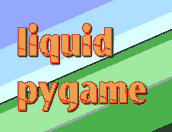

In [ ]:
# Pillowモジュールの読み込み
from PIL import Image

# 画像の読み込み
img = Image.open(dst_filepath)

img

In [40]:
import struct

bmp_filepath = "liquid.bmp"  # 修正：正しいパス
src_filepath = "../sample/README.md"
dst_filepath = "a.bmp"

# BMPヘッダ解析と画像データ開始位置の取得
with open(bmp_filepath, "rb") as f:
    body = f.read()
    f_header = struct.unpack("<2sIHHI", body[:14])  # ファイルヘッダ
    img_offset = f_header[4]

# 埋め込みたいファイルの読み込み
with open(src_filepath, "rb") as f:
    src_body = f.read()

# 新しいBMPファイルとして保存（画像データ部分を空にし、README.mdを埋め込み）
with open(dst_filepath, "wb") as f:
    f.write(body[: 14 + 40])  # BMPヘッダ+情報ヘッダ（54バイト）
    f.write(b"\x00" * (img_offset - 54))  # パディング（画像データ開始位置まで）
    f.write(src_body)  # README.mdを画像データとして埋め込む

In [41]:
dump2(dst_filepath)

         0  1  2  3  4  5  6  7  8  9  A  B  C  D  E  F
00000000:42 4D D6 2D 00 00 00 00 00 00 76 00 00 00 28 00   BM.-......v...(.
00000010:00 00 AC 00 00 00 84 00 00 00 01 00 04 00 00 00   ................
00000020:00 00 60 2D 00 00 12 0B 00 00 12 0B 00 00 10 00   ..`-............
00000030:00 00 10 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000040:00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000050:00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000060:00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00   ................
00000070:00 00 00 00 00 00 54 68 69 73 20 64 69 72 65 63   ......This direc
00000080:74 6F 72 79 20 69 6E 63 6C 75 64 65 73 20 61 20   tory includes a 
00000090:66 65 77 20 73 61 6D 70 6C 65 20 64 61 74 61 73   few sample datas
000000A0:65 74 73 20 74 6F 20 67 65 74 20 79 6F 75 20 73   ets to get you s
000000B0:74 61 72 74 65 64 2E 0A 0A 2A 20 20 20 60 63 61   tarted...*   `ca
000000C0:6C 69 66 6F 72 6E 69 61

In [42]:
# Pillowモジュールの読み込み
from PIL import Image

# 画像の読み込み
img = Image.open(dst_filepath)

img

<PIL.BmpImagePlugin.BmpImageFile image mode=P size=172x132>

In [ ]:
filepath = "roofline-analysis.png"